#Climate Conditions

##Load & Clean Data

In [39]:
%%writefile requirements.txt
streamlit
pandas
numpy
scikit-learn
matplotlib
seaborn
Pillow
joblib
torch
torchvision
opencv-python
kagglehub

Overwriting requirements.txt


In [40]:
#import dataset
#!pip install kagglehub
import kagglehub
import pandas as pd
import os
path1 = kagglehub.dataset_download("ayoubjadouli/morocco-wildfire-predictions-2010-2022-ml-dataset") #Dataset จาก Jadouli, A. (2023). *Morocco Wildfire Predictions (2010-2022) ML Dataset* [Data set]. Kaggle. https://www.kaggle.com/datasets/ayoubjadouli/morocco-wildfire-predictions-2010-2022-ml-dataset
file_path = os.path.join(path1, 'Date_final_dataset_balanced_float32.parquet')
df = pd.read_parquet(file_path)
df = df.head(20000)

In [41]:
#filter column จาก 128 ให้เหลือแค่ 8 ที่ใช้จริงๆ
df = df[['latitude','longitude','NDVI','average_temperature_lag_1', 'precipitation_lag_1','dew_point_lag_1','wind_speed_lag_1','is_fire','acq_date']].rename(columns={
    'average_temperature_lag_1': 'Temperature',
    'precipitation_lag_1': 'Precipitation',
    'dew_point_lag_1': 'Humidity',
    'wind_speed_lag_1': 'Windspeed',
    'acq_date': 'Date'})
# Farenhiet -> Celcius
df["Temperature"] = (df["Temperature"] - 32) * 5.0/9.0
df.rename(columns={"Temperature": "Temperature"}, inplace=True)

In [42]:
df.head(10)

,latitude,longitude,NDVI,Temperature,Precipitation,Humidity,Windspeed,is_fire,Date
0,31.390602,-4.254445,1139.0,23.055555,0.0,41.599998,6.200000,1.0,2015-05-28
1,33.832943,-5.188356,3223.0,7.333333,0.0,34.299999,5.400000,1.0,2017-12-05
2,35.385689,-5.684218,4987.0,18.055555,0.0,54.099998,21.299999,1.0,2021-11-19
3,30.122351,-7.498038,991.0,24.555553,0.0,23.799999,3.500000,0.0,2014-04-19
4,30.221554,-9.154314,2171.0,25.888889,0.0,46.299999,8.100000,1.0,2014-04-11
5,34.498917,-2.332624,1604.0,17.666666,0.0,54.000000,4.700000,0.0,2022-11-11
6,35.522633,-5.526712,5696.0,29.444445,0.0,52.099998,12.200000,1.0,2019-08-20
7,32.087673,-8.773463,1674.0,21.277779,0.0,58.500000,6.600000,0.0,2020-11-02
8,32.540138,-6.300411,2536.0,23.444443,0.0,58.099998,5.000000,1.0,2014-09-23
9,32.931473,-3.967042,1240.0,13.611111,0.0,30.700001,12.600000,0.0,2016-03-20


In [43]:
#Datetime to int
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop('Date', axis=1)

print(df.head())

    latitude  longitude    NDVI  Temperature  Precipitation   Humidity  \
0  31.390602  -4.254445  1139.0    23.055555            0.0  41.599998   
1  33.832943  -5.188356  3223.0     7.333333            0.0  34.299999   
2  35.385689  -5.684218  4987.0    18.055555            0.0  54.099998   
3  30.122351  -7.498038   991.0    24.555553            0.0  23.799999   
4  30.221554  -9.154314  2171.0    25.888889            0.0  46.299999   

   Windspeed  is_fire  Year  Month  Day  
0   6.200000      1.0  2015      5   28  
1   5.400000      1.0  2017     12    5  
2  21.299999      1.0  2021     11   19  
3   3.500000      0.0  2014      4   19  
4   8.100000      1.0  2014      4   11  


In [44]:
print(df.describe())

           latitude     longitude          NDVI   Temperature  Precipitation  \
count  20000.000000  20000.000000  20000.000000  20000.000000   20000.000000   
mean      32.772984     -6.085638   2642.974609     21.201656       0.990948   
std        2.313721      2.407105   1556.916870      6.609658       9.824984   
min       27.085873    -12.015475    -10.000000     -1.166667       0.000000   
25%       31.420129     -7.750529   1311.000000     16.263889       0.000000   
50%       33.368420     -5.644415   2244.000000     21.277779       0.000000   
75%       34.638043     -4.518609   3613.250000     25.666664       0.000000   
max       35.912964     -1.681020   7887.000000     42.944443      99.989998   

           Humidity     Windspeed       is_fire          Year         Month  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean     230.352646      7.154240      0.502300   2017.562300      6.901150   
std     1332.099854     17.573288      0.5

##Train Data

In [45]:
from sklearn.model_selection import train_test_split

X = df.drop('is_fire', axis=1)
y = df['is_fire']
#70:15:15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (14000, 10) (14000,)
Validation set shape: (3000, 10) (3000,)
Test set shape: (3000, 10) (3000,)


##Validate

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

y_test_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.929
[[1372  133]
 [  83 1412]]
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93      1505
         1.0       0.91      0.94      0.93      1495

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



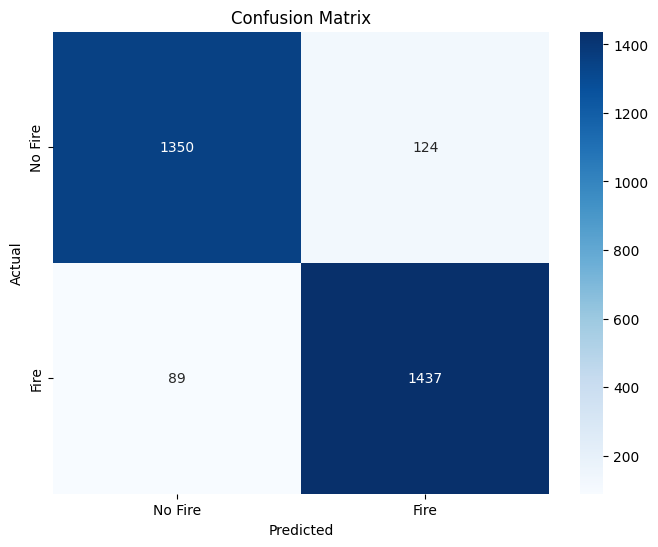

In [47]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

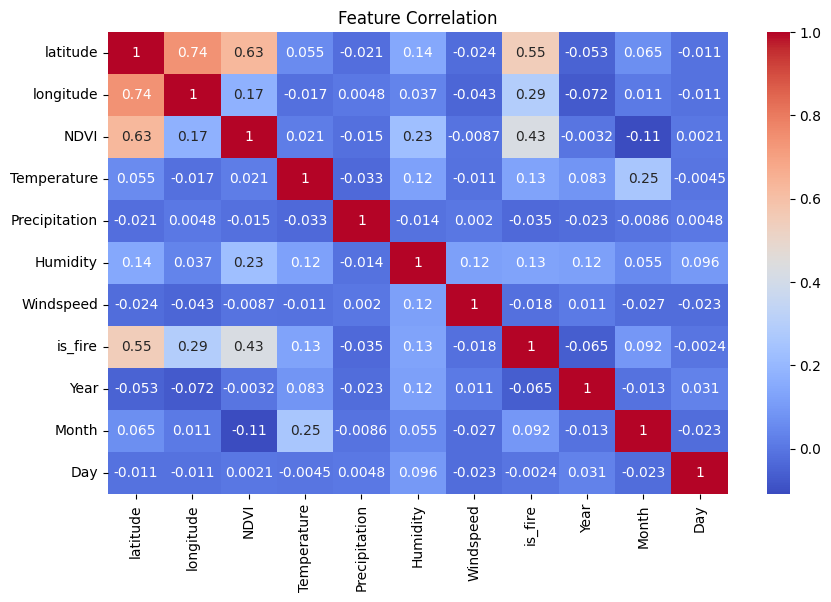

In [48]:
#Correlation & heat map
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [49]:
correlations = df.corr()["is_fire"].drop("is_fire").sort_values(ascending=False)

print("Features most positively related to wildfire:")
print(correlations.head())

print("\nFeatures most negatively related to wildfire:")
print(correlations.tail())

Features most positively related to wildfire:
latitude       0.548495
NDVI           0.425672
longitude      0.291265
Temperature    0.128878
Humidity       0.127225
Name: is_fire, dtype: float64

Features most negatively related to wildfire:
Month            0.091971
Day             -0.002352
Windspeed       -0.017637
Precipitation   -0.035004
Year            -0.065459
Name: is_fire, dtype: float64


In [65]:
df.to_csv('processed_data.csv', index=False)

#Satellite Images

In [51]:
#Load Data
!git clone https://github.com/opjns/Wildfire-prediction.git

fatal: destination path 'Wildfire-prediction' already exists and is not an empty directory.


In [52]:
import os

image_dir = "/content/Wildfire-prediction/Images/Train"

print("Sample images:")
print(os.listdir(image_dir)[:5])

Sample images:
['Wildfire', 'No Fire']


##Train

In [53]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=image_dir, transform=transform)

data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

print("Classes:", dataset.classes)

Classes: ['No Fire', 'Wildfire']


In [54]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16 * 111 * 111, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 111 * 111)
        x = self.fc1(x)
        return x

model = SimpleCNN()

In [55]:
import torch.optim as optim

# Use GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss:.3f} | Accuracy: {acc:.2f}%")

Epoch [1/10] Loss: 11.160 | Accuracy: 77.34%
Epoch [2/10] Loss: 3.561 | Accuracy: 93.84%
Epoch [3/10] Loss: 2.384 | Accuracy: 95.32%
Epoch [4/10] Loss: 0.860 | Accuracy: 97.29%
Epoch [5/10] Loss: 0.596 | Accuracy: 98.52%
Epoch [6/10] Loss: 0.549 | Accuracy: 99.01%
Epoch [7/10] Loss: 0.277 | Accuracy: 99.01%
Epoch [8/10] Loss: 0.281 | Accuracy: 99.26%
Epoch [9/10] Loss: 0.351 | Accuracy: 98.52%
Epoch [10/10] Loss: 0.477 | Accuracy: 98.03%


##Validate

In [56]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

valid_dir = "/content/Wildfire-prediction/Images/Valid"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

valid_dataset = datasets.ImageFolder(root=valid_dir, transform=transform)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [57]:
import torch

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_accuracy = 100 * correct / total
print(f"Validation Accuracy: {val_accuracy:.2f}%")

Validation Accuracy: 86.21%


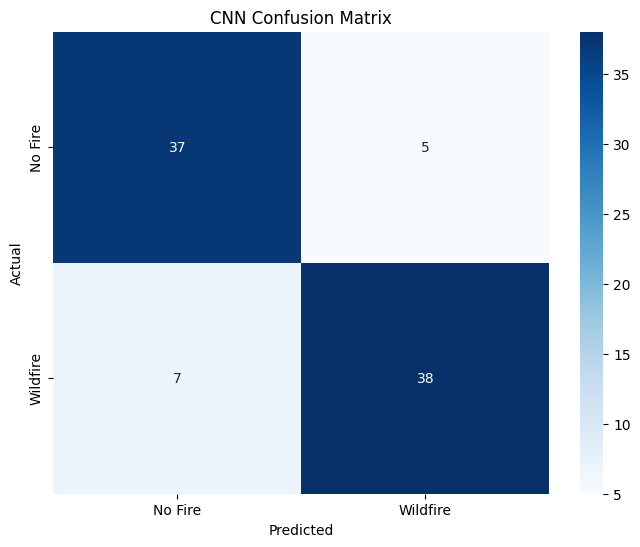

In [58]:
import matplotlib.pyplot as plt
model.eval()
y_pred_cnn_list = []
y_true_cnn_list = []

with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred_cnn_list.extend(predicted.cpu().numpy())
        y_true_cnn_list.extend(labels.cpu().numpy())

cm_cnn = confusion_matrix(y_true_cnn_list, y_pred_cnn_list)

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues",
            xticklabels=valid_dataset.classes, yticklabels=valid_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN Confusion Matrix")
plt.show()


#Save and deploy model

In [59]:
import joblib
joblib.dump(model, 'wildfire_model.py')

['wildfire_model.py']

In [64]:
%%writefile wildfire-prediction-app.py
import streamlit as st
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image

# Define model architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 111 * 111, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 111 * 111)
        x = self.fc1(x)
        return x

# Load model weights
model = SimpleCNN()
model.load_state_dict(torch.load("model_weights.pth", map_location=torch.device('cpu')))
model.eval()

# Streamlit app
st.title("Wildfire Prediction App")

st.header("Enter Environmental Data")
lat = st.number_input("Latitude")
lon = st.number_input("Longitude")
ndvi = st.number_input("NDVI")
temp = st.number_input("Temperature (°C)", -20.0, 60.0)
precipitation = st.number_input("Precipitation (mm)")
humidity = st.number_input("Humidity (%)", 0, 100)
windspeed = st.number_input("Wind Speed (m/s)")
day = st.number_input("Day", 1, 31, step=1)
month = st.number_input("Month", 1, 12, step=1)
year = st.number_input("Year")

st.header("Upload Satellite Image")
image_file = st.file_uploader("Upload a satellite image", type=["jpg", "jpeg", "png"])

if image_file and st.button("Predict Wildfire Risk"):
    image = Image.open(image_file).convert("RGB")
    image = image.resize((222, 222))
    st.image(image, caption="Uploaded Image", use_column_width=True)

    image_array = np.array(image) / 255.0
    image_tensor = torch.tensor(image_array).permute(2, 0, 1).unsqueeze(0).float()

    # Predict
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.softmax(outputs, dim=1).numpy()[0]
        prediction = int(np.argmax(probabilities))
        confidence = probabilities[prediction]

if prediction == 1:
  st.markdown(f"### Prediction: **{' Wildfire Risk' if prediction == 1 else 'No Wildfire'}**")
  st.markdown(f"### Confidence Level: **{confidence*100:.2f}%**")

if prediction == 1:
  st.warning(" **Safety Precautions**:\n- Avoid open flames\n- Report smoke or fire immediately\n- Keep emergency supplies ready\n- Stay updated with local alerts\n- Prepare evacuation plans")

Writing wildfire-prediction-app.py


In [61]:
import joblib
model = joblib.load("wildfire_model.py")
joblib.dump(model, 'model.pkl')

['model.pkl']

In [62]:
torch.save(model.state_dict(), 'model_weights.pth')

In [63]:
print("Features:\n", X_test[:5])
print("Labels:\n", y_test[:5])

Features:
         latitude  longitude    NDVI  Temperature  Precipitation   Humidity  \
5348   34.790142  -4.699377  3318.0    24.277777           0.00  63.900002   
339    33.930038  -5.576526  3600.0    25.722223           0.00  51.099998   
13591  30.959604  -6.287105  1050.0    26.611111           0.00  37.299999   
8153   34.103878  -5.630750  2171.0    21.277779           0.00  59.000000   
16345  33.709080  -5.805562  2544.0    10.222223           0.35  41.799999   

       Windspeed  Year  Month  Day  
5348         5.8  2017      9   25  
339         12.2  2013      9    2  
13591        5.2  2021      9   22  
8153         4.1  2013      8   27  
16345        6.0  2013     11   26  
Labels:
 5348     1.0
339      1.0
13591    0.0
8153     1.0
16345    1.0
Name: is_fire, dtype: float32
